In [13]:
##Classification algorithms
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

#Variable selection / PCA transformation
from sklearn.decomposition import PCA
#sklearn.feature_selection


import imblearn

#Estimation of classifier’s performance
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error,classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,f1_score, balanced_accuracy_score
from imblearn.over_sampling import RandomOverSampler 

from sklearn.metrics import roc_curve, auc

In [14]:
def feature_importances(rf_model, dataframe):
    return pd.DataFrame({'columns' : dataframe.columns, 
                         'importance' : rf_model.feature_importances_}
                       ).sort_values('importance', ascending=False)


In [15]:

with open("./data/spam.dat") as infile, open("spam.csv", "w",  newline='') as outfile:
    csv_writer = csv.writer(outfile,  delimiter=",")
    for line in infile.read().splitlines():
        csv_writer.writerow(c.strip() for c in line.strip(', ').split(','))       

print("end")

end


In [16]:
all_data = pd.read_csv('spam.csv')
all_data.head(5)

,ACT_NOW,ADDRESSES_ON_CD,ADULT_SITE,ADVERT_CODE,ADVERT_CODE2,ALL_CAPS_HEADER,ALL_CAP_PORN,ALL_NATURAL,AMATEUR_PORN,AMAZING,...,X_ENC_PRESENT,X_LIBRARY,X_LIST_UNSUBSCRIBE,X_MSMAIL_PRIORITY_HIGH,X_PRECEDENCE_REF,X_PRIORITY_HIGH,X_STORMPOST_TO,X_X_PRESENT,YOUR_INCOME,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,no
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,no
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes


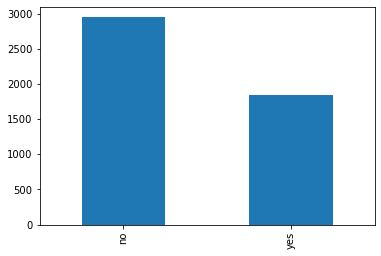

array(['no', 'yes'], dtype=object)

In [17]:
all_data['target'].value_counts().plot.bar()
plt.show()

encoder = LabelEncoder()
encoder.fit(all_data['target'])
encoder.classes_

In [18]:
all_data['target'] = encoder.transform(all_data['target'])
all_data['target'].value_counts()

data = all_data

y =all_data.iloc[:, 462].values
X = all_data.drop('target', axis=1)
X.head(5)
print(y)

[1 0 1 ... 1 0 1]


In [19]:
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

# train is now 60% of the entire data set the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train, x_val, x_test)

      ACT_NOW  ADDRESSES_ON_CD  ADULT_SITE  ADVERT_CODE  ADVERT_CODE2  \
2931        0                0           0            0             0   
4743        0                0           0            0             0   
188         0                0           0            0             0   
4600        0                0           0            0             0   
1683        0                0           0            0             0   
...       ...              ...         ...          ...           ...   
1415        0                0           0            0             0   
2828        0                0           0            0             0   
3665        0                0           0            0             0   
2070        0                0           0            0             0   
1443        0                0           0            0             0   

      ALL_CAPS_HEADER  ALL_CAP_PORN  ALL_NATURAL  AMATEUR_PORN  AMAZING  ...  \
2931                0             0        

In [20]:
#logistic regression,
clf_lr = LogisticRegression()

#random forest,
clf_forest = RandomForestClassifier()

#tree
clf_tree = DecisionTreeClassifier()

#naive bayes
clf_NB = MultinomialNB()

#k-nn classifier,
clf_knc = KNeighborsClassifier()

#SVM,
clf_svm = svm.SVC()

#neural network,
clf_mlp = MLPClassifier()

In [49]:
clf_lr.fit(x_train, y_train)
clf_forest.fit(x_train, y_train)
clf_tree.fit(x_train, y_train)
clf_NB.fit(x_train, y_train)
clf_knc.fit(x_train, y_train)
clf_svm.fit(x_train, y_train)
clf_mlp.fit(x_train, y_train)


print("end")

end


In [48]:
y_train_lr = clf_lr.predict(x_train)
y_train_forest = clf_forest.predict(x_train)
y_train_tree = clf_tree.predict(x_train)
y_train_NB = clf_NB.predict(x_train)
y_train_knc = clf_knc.predict(x_train)
y_train_svm = clf_svm.predict(x_train)
y_train_mlp = clf_mlp.predict(x_train)


In [50]:
print('Training accuracy Logistic Regression: ', clf_lr.score(x_train, y_train))
print('Training accuracy Random Forest Classifier: ', clf_forest.score(x_train, y_train))
print('Training accuracy Decision Tree Classifier: ', clf_tree.score(x_train, y_train))
print('Training accuracy Naive Bayes: ', clf_NB.score(x_train, y_train))
print('Training accuracy k-nn classifier: ', clf_knc.score(x_train, y_train))
print('Training accuracy SVN: ', clf_svm.score(x_train, y_train))
print('Training accuracy Neural Network: ', clf_mlp.score(x_train, y_train))

Training accuracy Logistic Regression:  0.9885137486947442
Training accuracy Random Forest Classifier:  0.9989557953358859
Training accuracy Decision Tree Classifier:  0.9989557953358859
Training accuracy Naive Bayes:  0.9819004524886877
Training accuracy k-nn classifier:  0.9457013574660633
Training accuracy SVN:  0.9916463626870867
Training accuracy Neural Network:  0.9986077271145144


In [51]:

print('Validation accuracy Logistic Regression: ', clf_lr.score(x_val, y_val))
print('Validation accuracy Random Forest Classifier: ', clf_forest.score(x_val, y_val))
print('Validation accuracy Decision Tree Classifier: ', clf_tree.score(x_val, y_val))
print('Validation accuracy Naive Bayes: ', clf_NB.score(x_val, y_val))
print('Validation accuracy k-nn classifier: ', clf_knc.score(x_val, y_val))
print('Validation accuracy SVN: ', clf_svm.score(x_val, y_val))
print('Validation accuracy Neural Network: ', clf_mlp.score(x_val, y_val))


Validation accuracy Logistic Regression:  0.9812108559498957
Validation accuracy Random Forest Classifier:  0.9874739039665971
Validation accuracy Decision Tree Classifier:  0.9718162839248434
Validation accuracy Naive Bayes:  0.9770354906054279
Validation accuracy k-nn classifier:  0.9248434237995825
Validation accuracy SVN:  0.9853862212943633
Validation accuracy Neural Network:  0.9822546972860126


In [52]:
print('Testing accuracy Logistic Regression: ', clf_lr.score(x_test, y_test))
print('Testing accuracy Random Forest Classifier: ', clf_forest.score(x_test, y_test))
print('Testing accuracy Decision Tree Classifier: ', clf_tree.score(x_test, y_test))
print('Testing accuracy Naive Bayes: ', clf_NB.score(x_test, y_test))
print('Testing accuracy k-nn classifier: ', clf_knc.score(x_test, y_test))
print('Testing accuracy SVN: ', clf_svm.score(x_test, y_test))
print('Testing accuracy Neural Network: ', clf_mlp.score(x_test, y_test))


Testing accuracy Logistic Regression:  0.9780793319415448
Testing accuracy Random Forest Classifier:  0.9843423799582464
Testing accuracy Decision Tree Classifier:  0.9770354906054279
Testing accuracy Naive Bayes:  0.975991649269311
Testing accuracy k-nn classifier:  0.9196242171189979
Testing accuracy SVN:  0.9843423799582464
Testing accuracy Neural Network:  0.9780793319415448


In [27]:
#The purpose of fine-tuning the classifier is to:
#- minimize the “yesno” error rate,
#- while ensuring that “noyes” error rate is < 1%.
## RANDOM FOREST
## SVN

In [28]:
#Selected classifiers:
#clf_svm 
#clf_forest

y_test_svm = clf_svm.predict(x_test)
print("\nConfusion matrix SVM\n" , confusion_matrix(y_test, y_test_svm ))
print("\nClassification report SVM \n" , classification_report(y_test, y_test_svm ))
#Balanced accuracy
print("\nBalanced accuracy SVM \n" ,balanced_accuracy_score(y_test, y_test_svm))


y_test_forest =  clf_forest.predict(x_test)
print("\nConfusion matrix Random Forest Classifier\n" , confusion_matrix(y_test, y_test_forest ))
print("\nClassification report Random Forest Classifier \n" , classification_report(y_test, y_test_forest ))
#Balanced accuracy
print("\nBalanced accuracy Random Forest Classifier \n" ,balanced_accuracy_score(y_test, y_test_forest ))




Confusion matrix SVM
 [[591   1]
 [ 14 352]]

Classification report SVM 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       592
           1       1.00      0.96      0.98       366

    accuracy                           0.98       958
   macro avg       0.99      0.98      0.98       958
weighted avg       0.98      0.98      0.98       958


Balanced accuracy SVM 
 0.9800297223452961

Confusion matrix Random Forest Classifier
 [[590   2]
 [ 12 354]]

Classification report Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       592
           1       0.99      0.97      0.98       366

    accuracy                           0.99       958
   macro avg       0.99      0.98      0.98       958
weighted avg       0.99      0.99      0.99       958


Balanced accuracy Random Forest Classifier 
 0.9819173681878599


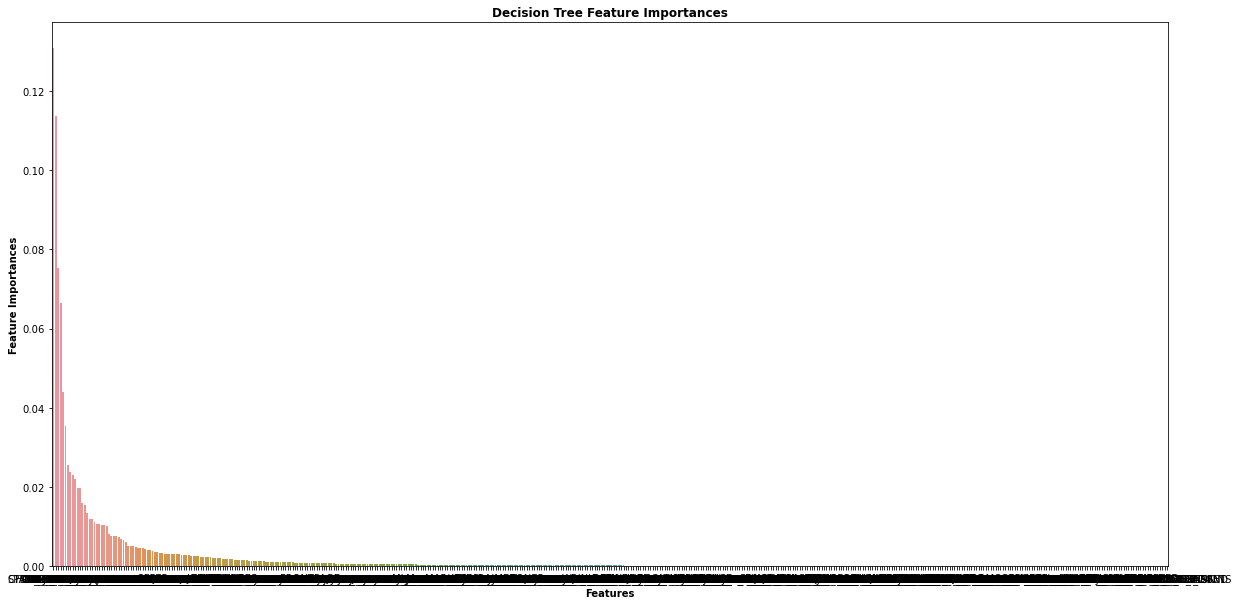

                   columns  importance
53         CTYPE_JUST_HTML    0.130892
39             CLICK_BELOW    0.113853
441               WEB_BUGS    0.075256
364      SPAM_PHRASE_00_01    0.066429
335              RESENT_TO    0.043984
..                     ...         ...
241  MIME_BOUND_MIME_BOUND    0.000000
264             NAME_BRAND    0.000000
266  NEW_DOMAIN_EXTENSIONS    0.000000
269    NONEXISTENT_CHARSET    0.000000
231        MARKET_SOLUTION    0.000000

[462 rows x 2 columns]


In [29]:
importances = feature_importances(clf_forest, X)

plt.figure(figsize=(20,10))
sns.barplot(x="columns", y="importance", data=importances)
plt.ylabel("Feature Importances", weight='bold')
plt.xlabel("Features", weight='bold')
plt.title("Decision Tree Feature Importances", weight='bold')
plt.show()
print(importances)


In [30]:
import statsmodels.api as sm

#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.01):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

print("end")

['ADVERT_CODE2', 'ALL_CAPS_HEADER', 'AOL_USERS_LINK', 'APPROVED_BY', 'BAD_CREDIT', 'BASE64_ENC_TEXT', 'BIG_FONT', 'BUGGY_CGI', 'BUGZILLA_BUG', 'CARRIAGE_RETURNS', 'CBYI', 'CLICK_BELOW', 'CLICK_HERE_CAPS_LINK', 'CLICK_TO_REMOVE_2', 'COPY_ACCURATELY', 'CRON_ENV', 'CTYPE_JUST_HTML', 'DATE_IN_FUTURE_03_06', 'DATE_IN_FUTURE_06_12', 'DATE_IN_FUTURE_12_24', 'DATE_IN_FUTURE_24_48', 'DATE_IN_PAST_06_12', 'DATE_IN_PAST_12_24', 'DATE_IN_PAST_24_48', 'DATE_IN_PAST_96_XX', 'DEAR_SOMETHING', 'DOMAIN_4U2', 'EXCHANGE_SERVER', 'EXCUSE_12', 'EXCUSE_14', 'EXCUSE_3', 'EXCUSE_7', 'EXCUSE_FUTURE', 'FAKED_IP_IN_RCVD', 'FORGED_GW05_RCVD', 'FORGED_HOTMAIL_RCVD', 'FORGED_RCVD_FOUND', 'FORGED_RCVD_TRAIL', 'FORGED_YAHOO_RCVD', 'FOR_FREE', 'FREE_GRANT', 'FREE_MEMBERSHIP', 'FREE_MONEY', 'FROM_AND_TO_SAME_1', 'FROM_AND_TO_SAME_5', 'FROM_EGROUPS', 'FROM_ENDS_IN_NUMS', 'FROM_HAS_MIXED_NUMS', 'FRONTPAGE', 'FULL_REFUND', 'GAPPY_TEXT', 'HAIR_LOSS', 'HARDCORE_PORN', 'HEADER_8BITS', 'HTML_50_70', 'HTML_70_90', 'HTML_COMMEN

In [31]:
X_f = all_data[selected_features_BE]
X_f.head()

,ADVERT_CODE2,ALL_CAPS_HEADER,AOL_USERS_LINK,APPROVED_BY,BAD_CREDIT,BASE64_ENC_TEXT,BIG_FONT,BUGGY_CGI,BUGZILLA_BUG,CARRIAGE_RETURNS,...,USER_AGENT_PINE,USER_IN_WHITELIST,US_DOLLARS,WEB_BUGS,WEIRD_PORT,X_ACCEPT_LANG,X_LIST_UNSUBSCRIBE,X_MSMAIL_PRIORITY_HIGH,X_PRIORITY_HIGH,X_STORMPOST_TO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

# minority 
x_train_over_1, x_test_over_1, y_train_over_1, y_test_over_1 = train_test_split(X_f , y, test_size=1 - train_ratio)
x_val_over_1, x_test_over_1, y_val_over_1, y_test_over_1 = train_test_split(x_test_over_1, y_test_over_1, test_size=test_ratio/(test_ratio + validation_ratio)) 


# majority 
x_train_over_2, x_test_over_2, y_train_over_2, y_test_over_2 = train_test_split(X_f , y, test_size=1 - train_ratio)
x_val_over_2, x_test_over_2, y_val_over_2, y_test_over_2 = train_test_split(x_test_over_2, y_test_over_2, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train_over_1, x_val_over_1, x_test_over_1)



      ADVERT_CODE2  ALL_CAPS_HEADER  AOL_USERS_LINK  APPROVED_BY  BAD_CREDIT  \
2801             0                0               0            0           0   
1446             0                0               0            0           0   
777              0                0               0            0           0   
2492             0                0               0            0           0   
2871             0                0               0            0           0   
...            ...              ...             ...          ...         ...   
581              0                0               0            0           0   
1111             0                0               0            0           0   
142              0                0               0            0           0   
3251             0                0               0            0           0   
558              0                0               0            0           0   

      BASE64_ENC_TEXT  BIG_FONT  BUGGY_

In [33]:
# - 'minority': resample only the minority class;
oversample_1 = RandomOverSampler(sampling_strategy='minority')

#'not minority': resample all classes but the minority class;
oversample_2 = RandomOverSampler(sampling_strategy='not minority')


# fit and apply the transform
x_train_over_1, y_train_over_1 = oversample_1.fit_resample(x_train_over_1 , y_train_over_1)
x_val_over_1,y_val_over_1 = oversample_1.fit_resample(x_val_over_1 , y_val_over_1)

x_train_over_2, y_train_over_2 = oversample_2.fit_resample(x_train_over_2 , y_train_over_2)
x_val_over_2,y_val_over_2 = oversample_2.fit_resample(x_val_over_2 , y_val_over_2)


print("end")

end


In [34]:
##(e.g., settings related to simplicity / complexity of models, 
#'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
# 'max_features': ['auto', 'sqrt'],
# 'min_samples_leaf': [1, 2, 4],
# 'min_samples_split': [2, 5, 10],

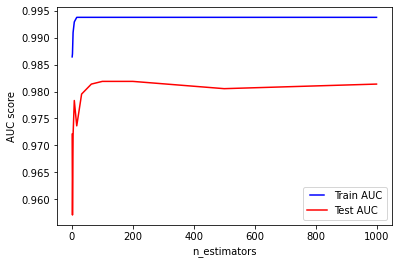

In [35]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100,200, 500, 1000 ]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train_over_1, y_train_over_1)
   train_pred = rf.predict(x_train_over_1)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_over_1, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test_over_1)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_over_1, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

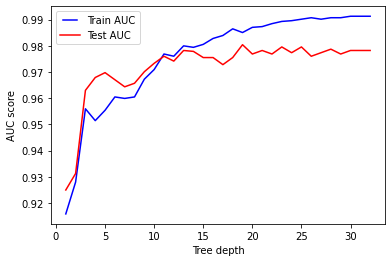

In [36]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(x_train_over_1, y_train_over_1)
   train_pred = rf.predict(x_train_over_1)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_over_1, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test_over_1)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_over_1, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

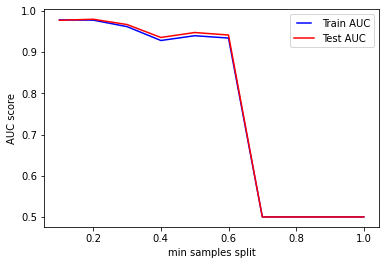

In [37]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(x_train_over_1, y_train_over_1)
   train_pred = rf.predict(x_train_over_1)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_over_1, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test_over_1)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_over_1, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()


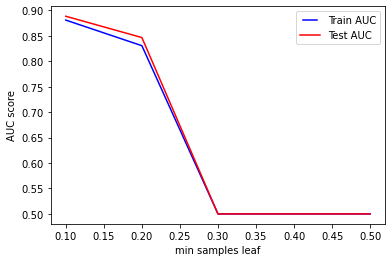

In [38]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(x_train_over_1, y_train_over_1)
   train_pred = rf.predict(x_train_over_1)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_over_1, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test_over_1)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_over_1, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [39]:
n_estimators = 60 
max_depth = 24
min_samples_leaf = 0.2

# Instantiate model with different number of decision trees
clf_forest_minority_default = RandomForestClassifier()
#clf_forest_minority = RandomForestClassifier(n_estimators = 60 , max_depth = 24,min_samples_leaf = 0.2)
clf_forest_minority = RandomForestClassifier(n_estimators = 60 , max_depth = 24)

# Instantiate model with different number of decision trees
clf_forest_majority_default = RandomForestClassifier()
#clf_forest_majority = RandomForestClassifier(n_estimators = 60  , max_depth = 24,min_samples_leaf = 0.2)
clf_forest_majority = RandomForestClassifier(n_estimators = 60  , max_depth = 24)

print("end")

end


In [40]:
# minority 
clf_forest_minority_default.fit(x_train_over_1, y_train_over_1)
clf_forest_minority.fit(x_train_over_1, y_train_over_1)


# majority 
clf_forest_majority_default.fit(x_train_over_2, y_train_over_2)
clf_forest_majority.fit(x_train_over_2, y_train_over_2)


print("end")

end


In [41]:
# minority 
y_train_n_default = clf_forest_minority_default.predict(x_train_over_1)
y_train_n_25 = clf_forest_minority.predict(x_train_over_1)

# majority 
y_train_n_default_2 = clf_forest_majority_default.predict(x_train_over_2)
y_train_n_25_2 = clf_forest_majority.predict(x_train_over_2)

print("end")

end


In [42]:
print("\nMinority")
print('Training accuracy default ', clf_forest_minority_default.score(x_train_over_1, y_train_n_default))
print('Training accuracy n_estimators = 60, max_depth = 24: ',clf_forest_minority.score(x_train_over_1 ,y_train_n_25))

print("\nMajority")
print('Training accuracy default: ', clf_forest_majority_default.score(x_train_over_2, y_train_n_default_2))
print('Training accuracy n_estimators = 60, max_depth = 24: ', clf_forest_majority.score(x_train_over_2 ,y_train_n_25_2))


Minority
Training accuracy default  1.0
Training accuracy n_estimators = 60, max_depth = 24:  1.0

Majority
Training accuracy default:  1.0
Training accuracy n_estimators = 60, max_depth = 24:  1.0


In [44]:
print("\n Minority")
print('Validation accuracy default: ',  clf_forest_minority_default.score(x_val_over_1, y_val_over_1 ))
print('Validation accuracy n_estimators = 60, max_depth = 24: ', clf_forest_minority.score(x_val_over_1 ,y_val_over_1))
p
print("\n Majority")
print('Validation accuracy default: ', clf_forest_majority_default.score(x_val_over_2, y_val_over_2))
print('Validation accuracy n_estimators = 60, max_depth = 24: ',clf_forest_majority.score(x_val_over_2 ,y_val_over_2))



 Minority
Validation accuracy default:  0.9898477157360406
Validation accuracy n_estimators = 60, max_depth = 24:  0.9890016920473773

 Majority
Validation accuracy default:  0.9801670146137788
Validation accuracy n_estimators = 60, max_depth = 24:  0.9770354906054279


In [53]:

print("\nMinority")
print('Testing accuracy default: ', clf_forest_minority_default.score(x_test_over_2, y_test_over_2))
print('Testing accuracy n_estimators = 60, max_depth = 24: ', clf_forest_minority.score(x_test_over_2, y_test_over_2))

print("\nMajority")
print('Testing accuracy default : ',  clf_forest_majority_default.score(x_test_over_1, y_test_over_1))
print('Testing accuracyn_estimators = 60, max_depth = 24: ', clf_forest_majority.score(x_test_over_1, y_test_over_1))



Minority
Testing accuracy default:  0.9895615866388309
Testing accuracy n_estimators = 60, max_depth = 24:  0.9874739039665971

Majority
Testing accuracy default :  0.9916492693110647
Testing accuracyn_estimators = 60, max_depth = 24:  0.988517745302714


In [54]:
y_test_n_default = clf_forest_minority_default.predict(x_test_over_2)
print("\nConfusion matrix default Minority\n" , confusion_matrix(y_test_over_2, y_test_n_default ))
print("\nClassification report default Minority \n" , classification_report(y_test_over_2,y_test_n_default ))
#Balanced accuracy
print("\nBalanced accuracy default Minority \n" ,balanced_accuracy_score(y_test_over_2, y_test_n_default))

y_test_n_default = clf_forest_minority.predict(x_test_over_2)
print("\nConfusion matrix n_estimators = 60, max_depth = 24 Minority\n" , confusion_matrix(y_test_over_2, y_test_n_default ))
print("\nClassification report n_estimators = 60, max_depth = 24 Minority \n" , classification_report(y_test_over_2,y_test_n_default ))
#Balanced accuracy
print("\nBalanced accuracy n_estimators = 60, max_depth = 24 Minority \n" ,balanced_accuracy_score(y_test_over_2, y_test_n_default))


y_test_n_default = clf_forest_majority_default.predict(x_test_over_1)
print("\nConfusion matrix default Majority\n" , confusion_matrix(y_test_over_1, y_test_n_default ))
print("\nClassification report default Majority \n" , classification_report(y_test_over_1,y_test_n_default ))
#Balanced accuracy
print("\nBalanced accuracy default Majorityy \n" ,balanced_accuracy_score(y_test_over_1, y_test_n_default))

y_test_n_default = clf_forest_majority.predict(x_test_over_1)
print("\nConfusion matrix n_estimators = 60, max_depth = 24 Majority\n" , confusion_matrix(y_test_over_1, y_test_n_default ))
print("\nClassification report n_estimators = 60, max_depth = 24 Majority \n" , classification_report(y_test_over_1,y_test_n_default ))
#Balanced accuracy
print("\nBalanced accuracy n_estimators = 60, max_depth = 24 Majority \n" ,balanced_accuracy_score(y_test_over_1, y_test_n_default))



Confusion matrix default Minority
 [[584   5]
 [  5 364]]

Classification report default Minority 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       589
           1       0.99      0.99      0.99       369

    accuracy                           0.99       958
   macro avg       0.99      0.99      0.99       958
weighted avg       0.99      0.99      0.99       958


Balanced accuracy default Minority 
 0.9889804500761477

Confusion matrix n_estimators = 60, max_depth = 24 Minority
 [[586   3]
 [  9 360]]

Classification report n_estimators = 60, max_depth = 24 Minority 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       589
           1       0.99      0.98      0.98       369

    accuracy                           0.99       958
   macro avg       0.99      0.99      0.99       958
weighted avg       0.99      0.99      0.99       958


Balanced accuracy n_estimators = 6

In [ ]:
#Metamodels / metalearning



In [ ]:

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
